# Data Description

# Importing the Libraries

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
df = pd.read_csv('CustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# get the shape of the data.
df.shape

(7043, 21)

In [4]:
# inforamtion on the columns of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

'customerID', 'gender','Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','TotalCharges', 'Churn' are <B> Categorical datatypes</B>

While 'SeniorCitizen','tenure','MonthlyCharges' are <B> Numerical columns </B>

# checking for any missing data in the dataset

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

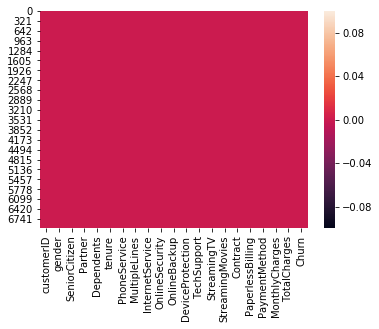

In [7]:
sns.heatmap(df.isna())

We see that there are no null values in dataset

# Checking Correlation

In [8]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


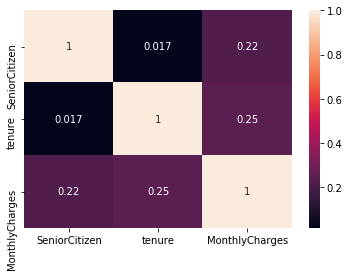

In [9]:
# plotting the correlation heatmap
sns.heatmap(df.corr(),annot=True)

No Such high correlation between Datatypes

## Univariate Analysis.

### Gender

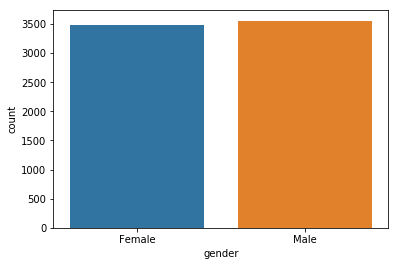

In [10]:
sns.countplot(df.gender)

In [11]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Both of the genders are approximately equal

### Senior-Citizen

In [12]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

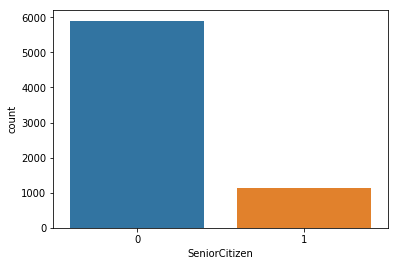

In [13]:
sns.countplot(df.SeniorCitizen)

Majority of the people are not senior citizens.

### Partner

In [14]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

* This variable shows you have taking the telecom connection individually or in a partnership.

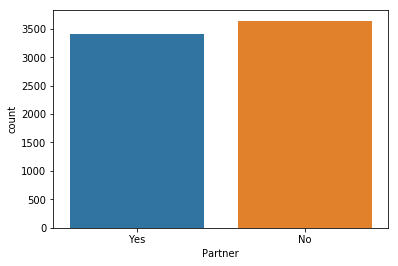

In [15]:
sns.countplot(df.Partner)

* There is are balanced ratio between the partnered and indivudal connections customers.

### Dependent

In [16]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

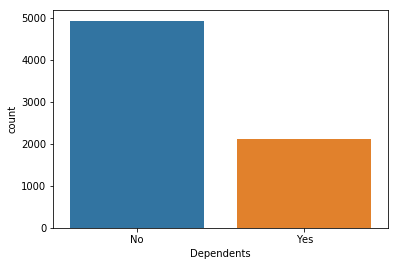

In [17]:
sns.countplot(df.Dependents)

Most of the customers are independent.

### Tenure 

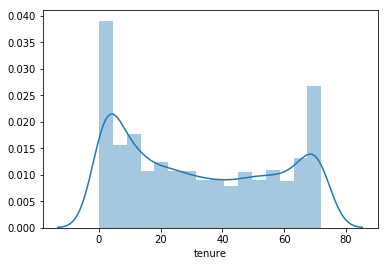

In [18]:
sns.distplot(df.tenure)

We see that value at 0 and 70 is higher

### Phone Service

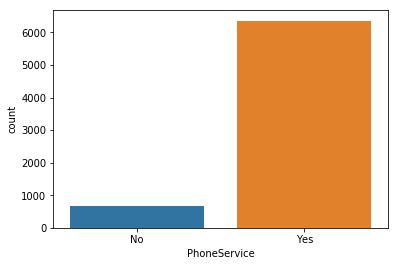

In [19]:
sns.countplot(df.PhoneService)

We see that many of them have a PhoneService

### Multiline

In [20]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

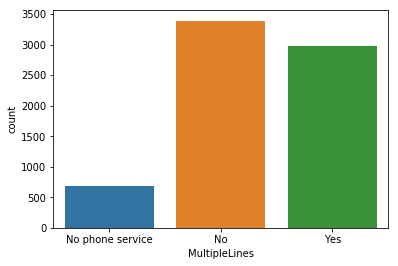

In [21]:
sns.countplot(df.MultipleLines)

We see that majority have no multiple lines, then comes with Multiple Lines and minimum are those with No PhoneService

### Internet servies

In [22]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

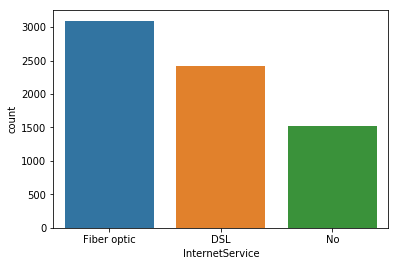

In [23]:
sns.countplot(df.InternetService,order=df.InternetService.value_counts().index)

<B>OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies </B> are the columns which can be availed only when There is Internet Service

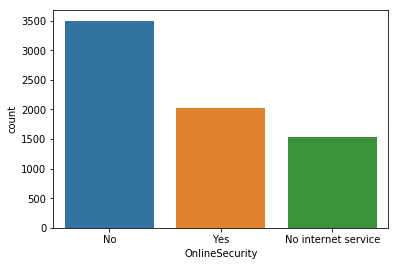

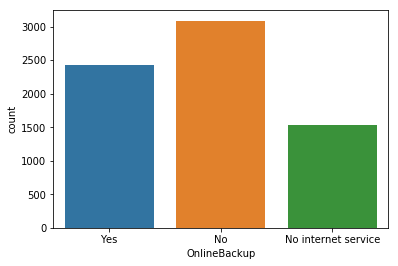

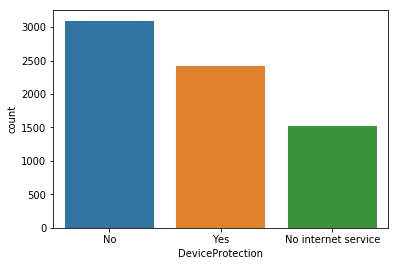

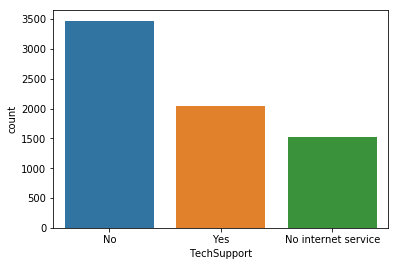

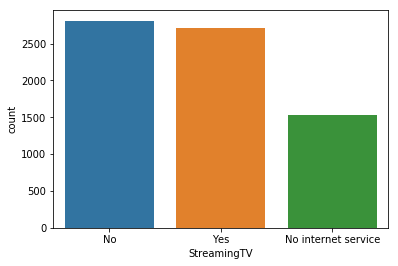

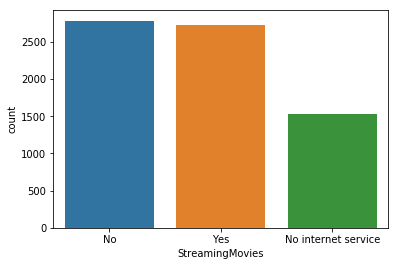

In [24]:
for service in  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies':
    plt.figure()
    sns.countplot(df[service],hue_order={'Yes':'r','No':'blue','No internet service':'green'})
    sns.countplot(df[service])

We see that in Each Case Majority of the people don't use that thing

# Contract

In [25]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

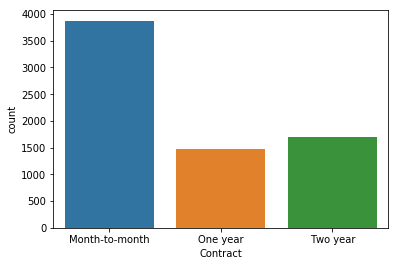

In [26]:
sns.countplot(df.Contract)

* Customers mostly prefer the month to month contract.

### Payments mathod

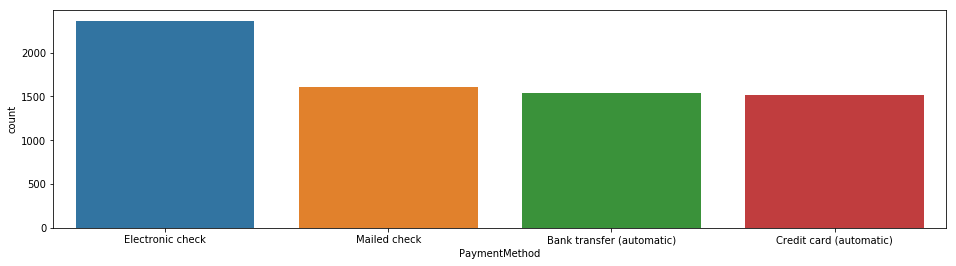

In [27]:
plt.figure(figsize=(16,4))
sns.countplot(df.PaymentMethod)

Electronic Check is prefered way of Payment by the customers.

# monthly charges and total monthly charges.

In [28]:
df.MonthlyCharges

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

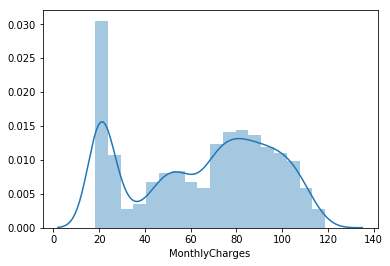

In [29]:
sns.distplot(df.MonthlyCharges)

We see that peak near to 20 here

# Total Monthly charges.

In [30]:
df.TotalCharges.dtype

dtype('O')

In [31]:
df[df.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [32]:
len(df[df.TotalCharges == ' '])

11

In [33]:
df.TotalCharges.replace(' ',np.nan,inplace=True)

In [34]:
df.TotalCharges = df.TotalCharges.astype('float')

## Multivariate anaysis.

In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
# internet service vs the monthly price

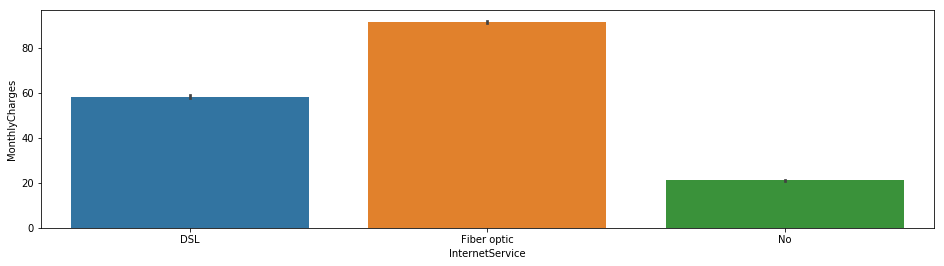

In [37]:
plt.figure(figsize=(16,4))
sns.barplot(df.InternetService,df.MonthlyCharges)

Fibre optic are costly than DSL 

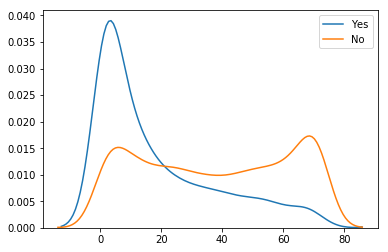

In [38]:
# tenure vs churn
sns.kdeplot(df[df.Churn == 'Yes']['tenure'],label='Yes')
sns.kdeplot(df[df.Churn != 'Yes']['tenure'],label='No')

# multiple lines vs monthly bills

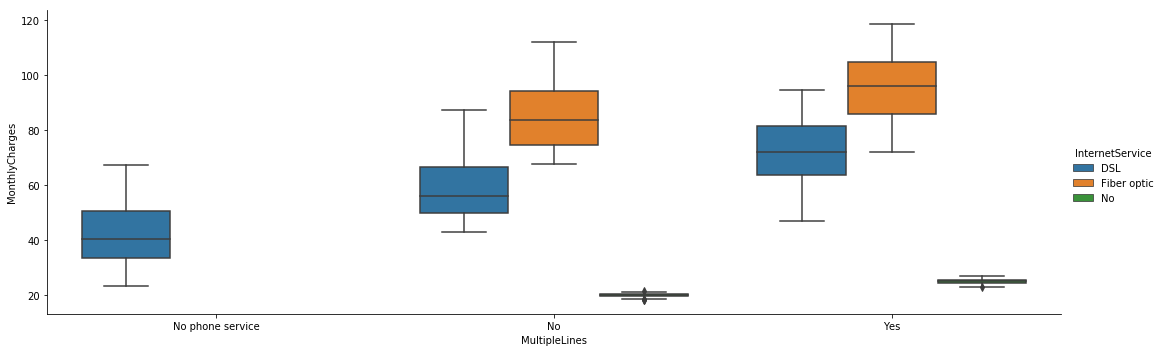

In [39]:
sns.catplot(x='MultipleLines',y='MonthlyCharges',data=df,kind='box',hue='InternetService',aspect=3)

# payment method vs tenure

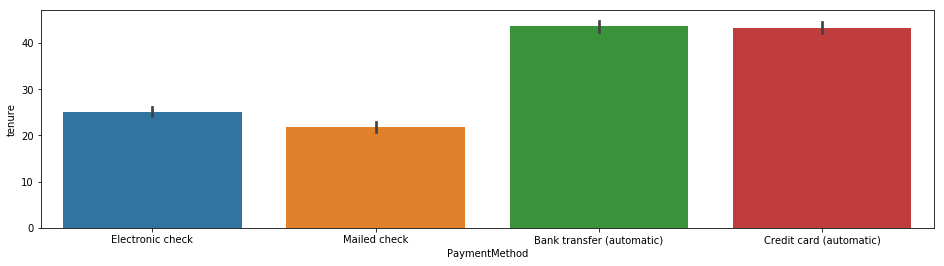

In [40]:
plt.figure(figsize=(16,4))
sns.barplot(df.PaymentMethod,df.tenure)

* The cutomers with high lenure are very likely to have automatic payment method (bank transfers and credit cards).

# Total charges vs churns

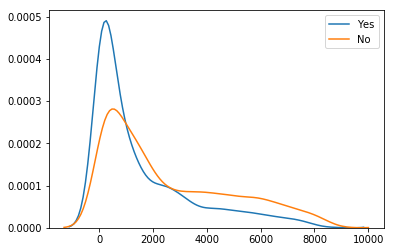

In [41]:
sns.kdeplot(df[df.Churn == 'Yes']['TotalCharges'],label='Yes')
sns.kdeplot(df[df.Churn != 'Yes']['TotalCharges'],label='No')

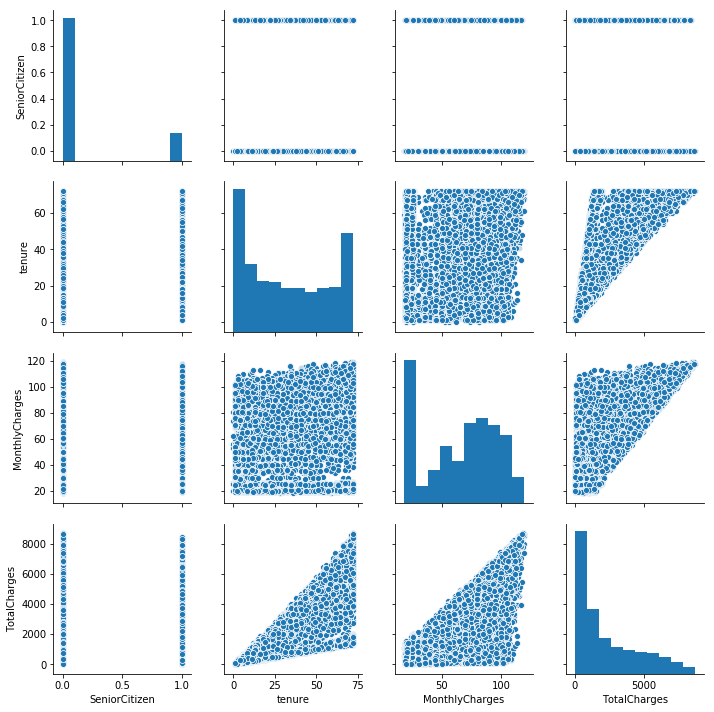

In [42]:
sns.pairplot(df)

In [43]:
# the internet services

In [44]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [45]:
df[df.InternetService == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


In [46]:
sub_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','MonthlyCharges']

In [47]:
df_sub_services = df[df.InternetService != 'No'][sub_services]

In [48]:
df_sub_services.head()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges
0,No,Yes,No,No,No,No,29.85
1,Yes,No,Yes,No,No,No,56.95
2,Yes,Yes,No,No,No,No,53.85
3,Yes,No,Yes,Yes,No,No,42.30
4,No,No,No,No,No,No,70.70


In [49]:
df_sub_services = df_sub_services.replace({'Yes':1,'No':0})

In [50]:
df_sub_services

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges
0,0,1,0,0,0,0,29.85
1,1,0,1,0,0,0,56.95
2,1,1,0,0,0,0,53.85
3,1,0,1,1,0,0,42.30
4,0,0,0,0,0,0,70.70
...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,84.80
7039,0,1,1,0,1,1,103.20
7040,1,0,0,0,0,0,29.60
7041,0,0,0,0,0,0,74.40


In [51]:
df_sub_services['AverageServices'] = df_sub_services.iloc[:,:-1].sum(axis=1)

In [52]:
df_sub_services

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,AverageServices
0,0,1,0,0,0,0,29.85,1
1,1,0,1,0,0,0,56.95,2
2,1,1,0,0,0,0,53.85,2
3,1,0,1,1,0,0,42.30,3
4,0,0,0,0,0,0,70.70,0
...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,84.80,5
7039,0,1,1,0,1,1,103.20,4
7040,1,0,0,0,0,0,29.60,1
7041,0,0,0,0,0,0,74.40,0


In [53]:
# average service vs monthly charges

In [54]:
df_sub_services.corr()['MonthlyCharges']

OnlineSecurity      0.069118
OnlineBackup        0.252337
DeviceProtection    0.321927
TechSupport         0.134233
StreamingTV         0.532439
StreamingMovies     0.525495
MonthlyCharges      1.000000
AverageServices     0.536399
Name: MonthlyCharges, dtype: float64

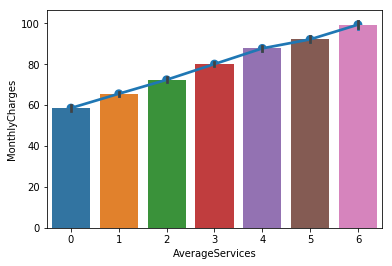

In [55]:
sns.pointplot(df_sub_services.AverageServices,df_sub_services.MonthlyCharges)
sns.barplot(df_sub_services.AverageServices,df_sub_services.MonthlyCharges)

The monthly charges increase as the number od subproducts increase.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
df.SeniorCitizen = df.SeniorCitizen.astype(object)

In [58]:
df.SeniorCitizen.dtype

dtype('O')

In [59]:
df.SeniorCitizen.replace({0:'No',1:'Yes'},inplace=True)

In [60]:
df.SeniorCitizen

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
# creating the copy of the raw dataset for preporcessing and model building.
df1= df.copy()

In [63]:
df1.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [64]:
# drop the 11 samples with TotalCharge = np.nan

In [65]:
df1.dropna(subset=['TotalCharges'],inplace=True)

In [66]:
df1.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## We need to encode this data

In [67]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [68]:
cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols: 
    df1[i]=le.fit_transform(df1[i]) 

In [69]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


# Checking For Outliers

In [70]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(df1))
z.shape

(7032, 21)

In [71]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  494,  497,  543,
        568,  595,  609,  615,  619,  633,  659,  666,  668,  673,  676,
        687,  715,  717,  734,  763,  774,  782,  788,  792,  811,  827,
        841,  845,  857,  864,  871,  873,  875,  882,  891,  915,  932,
        938,  940,  957,  970, 1008, 1015, 1034, 1047, 1048, 1050, 1069,
       1106, 1115, 1118, 1140, 1142, 1146, 1157, 1165, 1178, 1200, 1217,
       1221, 1238, 1251, 1253, 1267, 1274, 1294, 1307, 1322, 1327, 1329,
       1330, 1344, 1347, 1360, 1374, 1397, 1402, 1411, 1447, 1474, 1475,
       1476, 1495, 1501, 1508, 1514, 1555, 1557, 1576, 1579, 1609, 1615,
       1629, 1632, 1647, 1684, 1687, 1689, 1698, 1

In [72]:
df1_new=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df1_new.shape)

(7032, 21)
(6352, 21)


In [73]:
# Percent Data Loss
loss_percent=((7032-6352)/7032)*100
loss_percent

9.670079635949943

We see that Loss % in data is more than 7%, therefore we will not go for Outlier Removal

# Checking Skewness

In [74]:
df1.skew()

customerID          0.000000
gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

Considering skewness limit is +/- 0.65. We see that other than categorical data columns there isno such skewness in data. So we will not remove skewness

## x and y splitting

In [75]:
x = df1.drop('Churn',axis=1)
y = df1['Churn']

In [76]:
x.shape,y.shape

((7032, 20), (7032,))

# Finding Best Random State

In [77]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ", maxAccu,"on Random_State",maxRs)

Best Accuracy is  0.8180525941719972 on Random_State 99


We will use Random_State = 99 totrain our model

## Train and Test Split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=99)

## Training the model

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

In [81]:
model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print("\n")

Accuracy score: of LogisticRegression()
0.8180525941719972
[[957  85]
 [171 194]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1042
           1       0.70      0.53      0.60       365

    accuracy                           0.82      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407

Cross Validation Score: 0.7974961607326101
Difference Between Accuracy Score and CrossValidation Score: 0.020556433439387067


Accuracy score: of SVC()
0.7405828002842928
[[1042    0]
 [ 365    0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1042
           1       0.00      0.00      0.00       365

    accuracy                           0.74      1407
   macro avg       0.37      0.50      0.43      1407
weighted avg       0.55      0.74      0.63      1407

Cross Validation Score: 0.7342150252598014
Difference Between Accu

We see that difference between Accuracy Score and Cross Validation Score is for SVC() Model

# HyperParameter Tuning

## Saving the model.

In [82]:
import joblib
joblib.dump(sv,'customer_churn.obj')

['customer_churn.obj']